This notebook reproduces https://journals.aps.org/pra/abstract/10.1103/PhysRevA.102.023526

In [27]:
using HarmonicBalance
@variables γ, F, α, ω0, F0, η, ω, J, t, x(t), y(t);

diff_eq = DifferentialEquation([d(x,t,2) + γ * d(x,t) + ω0^2 * x + α*x^3+ 2*J*ω0*(x-y) - F0*cos(ω*t), 
            d(y,t,2) + γ * d(y,t) + ω0^2 * y + α*y^3 + 2*J*ω0*(y-x) - η*F0*cos(ω*t)], [x,y])


System of 2 differential equations
Variables:       x(t), y(t)
Harmonic ansatz: x(t) => ;   y(t) => ;   

α*(x(t)^3) + (ω0^2)*x(t) + γ*Differential(t)(x(t)) + 2J*ω0*(x(t) - y(t)) + Differential(t)(Differential(t)(x(t))) - F0*cos(t*ω) ~ 0
α*(y(t)^3) + γ*Differential(t)(y(t)) + (ω0^2)*y(t) + 2J*ω0*(y(t) - x(t)) + Differential(t)(Differential(t)(y(t))) - F0*η*cos(t*ω) ~ 0


In [28]:
# describe each variable using one Fourier component
add_harmonic!(diff_eq, x, ω)
add_harmonic!(diff_eq, y, ω)

harmonic_eq = get_harmonic_equations(diff_eq)

A set of 4 harmonic equations
Variables: u1(T), v1(T), u2(T), v2(T)
Parameters: α, ω, γ, ω0, F0, J, η

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)
y(t) = u2(T)*cos(ωt) + v2(T)*sin(ωt)

Harmonic equations:

γ*Differential(T)(u1(T)) + (ω0^2)*u1(T) + (3//4)*α*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (2//1)*J*ω0*u1(T) + (3//4)*α*(v1(T)^2)*u1(T) - F0 - (ω^2)*u1(T) - (2//1)*J*ω0*u2(T) ~ 0

(ω0^2)*v1(T) + γ*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^3) + (2//1)*J*ω0*v1(T) + (3//4)*α*(u1(T)^2)*v1(T) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - γ*ω*u1(T) - (2//1)*J*ω0*v2(T) ~ 0

γ*Differential(T)(u2(T)) + (ω0^2)*u2(T) + (3//4)*α*(u2(T)^3) + γ*ω*v2(T) + (2//1)*ω*Differential(T)(v2(T)) + (2//1)*J*ω0*u2(T) + (3//4)*α*(v2(T)^2)*u2(T) - F0*η - (ω^2)*u2(T) - (2//1)*J*ω0*u1(T) ~ 0

γ*Differential(T)(v2(T)) + (ω0^2)*v2(T) + (3//4)*α*(v2(T)^3) + (3//4)*α*(u2(T)^2)*v2(T) + (2//1)*J*ω0*v2(T) - (2//1)*ω*Differential(T)(u2(T)) - (ω^2)*v2(T) - (2//1)*J*ω0*v1(T) - γ*ω*u2(T) ~ 0


# Solving the resulting polynomial equations

In [29]:
fixed = (
    ω0 => 1.4504859, # natural frequency of separate modes (in paper, ħω0 - J)
    γ => 27.4E-6,    # damping
    J => 154.1E-6,   # coupling term
    α => 3.867E-7,   # Kerr nonlinearity
    ω => 1.4507941,  # pump frequency, resonant with antisymmetric mode (in paper, ħω0 + J)
    η => -0.08,      # pumping leaking to site 2  (F2 = ηF1)
    F0 => 0.002       # pump amplitude (overriden in sweeps)
)
varied = F0 => LinRange(0.002, 0.03, 50)

result = get_steady_states(harmonic_eq, varied, fixed)

A steady state result for 50 parameter points

Solution branches:   9
   of which real:    3
   of which stable:  2

Classes: stable, physical, Hopf, binary_labels


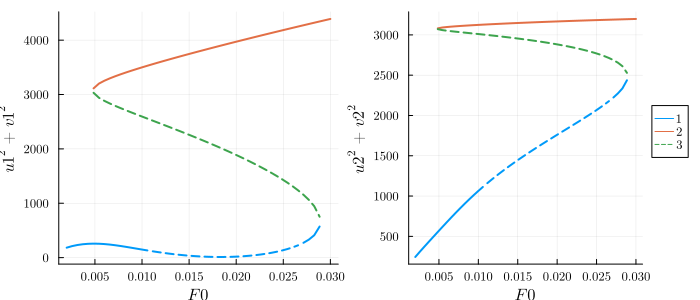

In [39]:
p1 = plot(result, "u1^2 + v1^2", legend=false)
p2 = plot(result, "u2^2 + v2^2")
plot(p1, p2, size=(700,300))

In [40]:
savefig("figs/time_dependent/lc_steady.png")

In [43]:
import HarmonicBalance.TimeEvolution: ODEProblem, DifferentialEquations.solve
initial_state = result[1][1]

T = 2E6
sweep = ParameterSweep(F0 => (0.002, 0.011), (0,T))

# start from initial_state, use sweep, total time is 2*T
time_problem = ODEProblem(harmonic_eq, initial_state, sweep=sweep, timespan=(0,2*T))
time_evo = solve(time_problem, saveat=100);

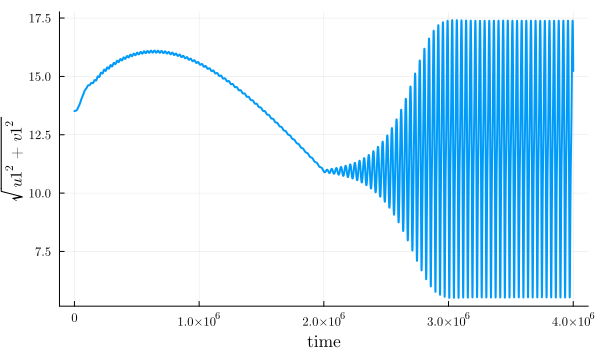

In [46]:
plot(time_evo, "sqrt(u1^2 + v1^2)", harmonic_eq, size=(600,350))

In [47]:
savefig("figs/time_dependent/lc_sweep.png")

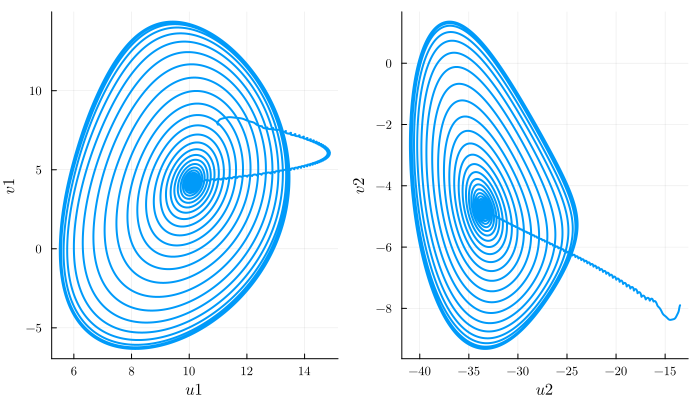

In [35]:
p1=plot(time_evo, ["u1", "v1"], harmonic_eq)
p2=plot(time_evo, ["u2", "v2"], harmonic_eq)
plot(p1,p2, size=(700,400))

In [36]:
savefig("figs/time_dependent/lc_uv.png")